In [47]:
from dataclasses import dataclass
import warnings
warnings.filterwarnings("ignore")

import importlib
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib
from scipy import stats
import sys

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind6")

import plot
importlib.reload(plot)
visualize = plot.visualize
overview = plot.overview


## Clang

Buddy: 484.24 GiB*m, 41.21 min
Buddy: delay 16.02 GiB, clean 16.02 GiB, drop 16.02 GiB, 644.86 GiB*m
LLFree: 500.30 GiB*m, 40.62 min
LLFree: delay 16.07 GiB, clean 16.07 GiB, drop 16.07 GiB, 661.33 GiB*m


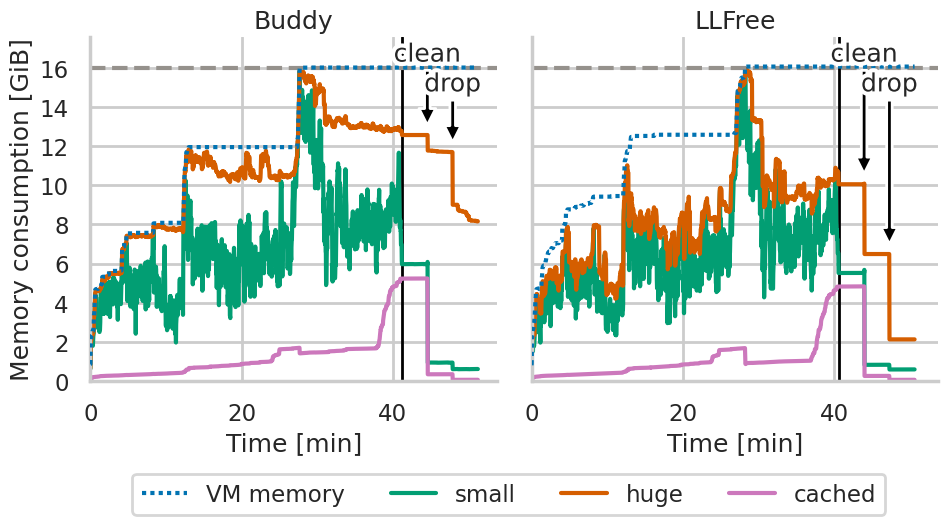

In [48]:
p = visualize({
    "Buddy": Path("latest/clang-base-manual"),
    "LLFree": Path("latest/clang-llfree-manual"),
}, "clang-baseline")

virtio-balloon: 430.61 GiB*m, 41.28 min
virtio-balloon: delay 12.22 GiB, clean 11.55 GiB, drop 7.99 GiB, 538.36 GiB*m
HyperAlloc: 357.68 GiB*m, 40.79 min
HyperAlloc: delay 10.62 GiB, clean 6.86 GiB, drop 1.90 GiB, 422.96 GiB*m


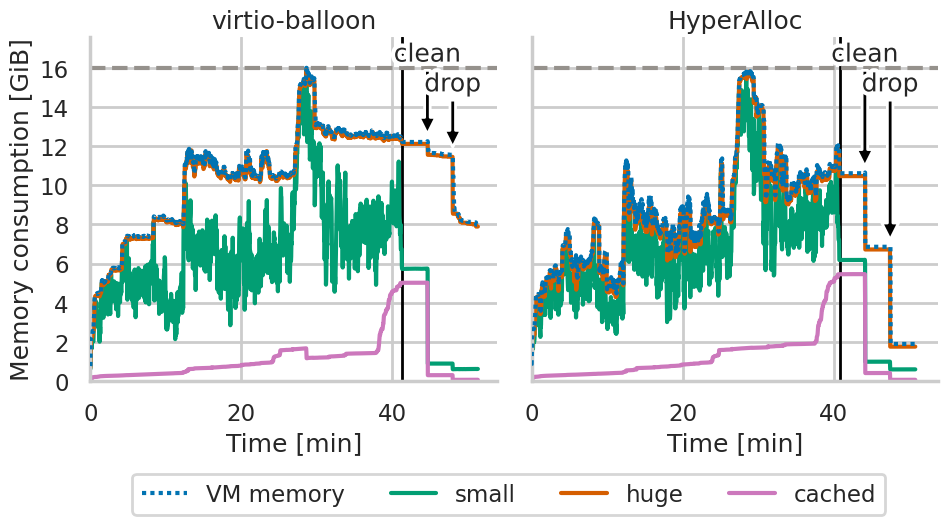

In [37]:
p = visualize({
    "virtio-balloon": Path("latest/clang-base-auto"),
    "HyperAlloc": Path("latest/clang-llfree-auto"),
}, "clang-auto")

virtio-mem+VFIO: 501.17 GiB*m, 41.12 min
virtio-mem+VFIO: delay 16.11 GiB, clean 10.11 GiB, drop 3.11 GiB, 600.78 GiB*m
HyperAlloc+VFIO: 358.56 GiB*m, 40.77 min
HyperAlloc+VFIO: delay 10.68 GiB, clean 6.92 GiB, drop 2.05 GiB, 425.15 GiB*m


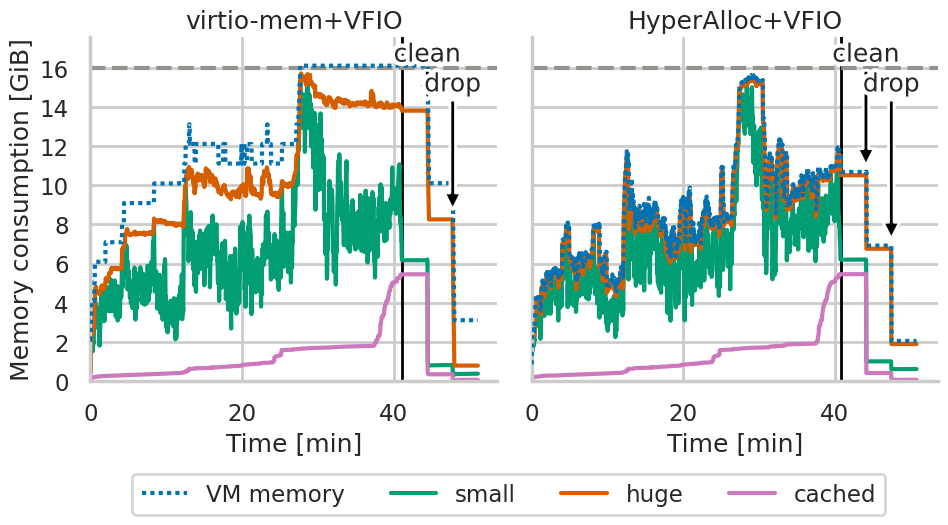

In [38]:
p = visualize({
    "virtio-mem+VFIO": Path("latest/clang-virtio-mem-vfio"),
    "HyperAlloc+VFIO": Path("latest/clang-llfree-auto-vfio"),
}, "clang-auto-vfio")


virtio-mem: 488.07 GiB*m, 41.01 min
virtio-mem: delay 15.78 GiB, clean 10.78 GiB, drop 2.59 GiB, 587.03 GiB*m
virtio-mem+VFIO: 501.17 GiB*m, 41.12 min
virtio-mem+VFIO: delay 16.11 GiB, clean 10.11 GiB, drop 3.11 GiB, 600.78 GiB*m


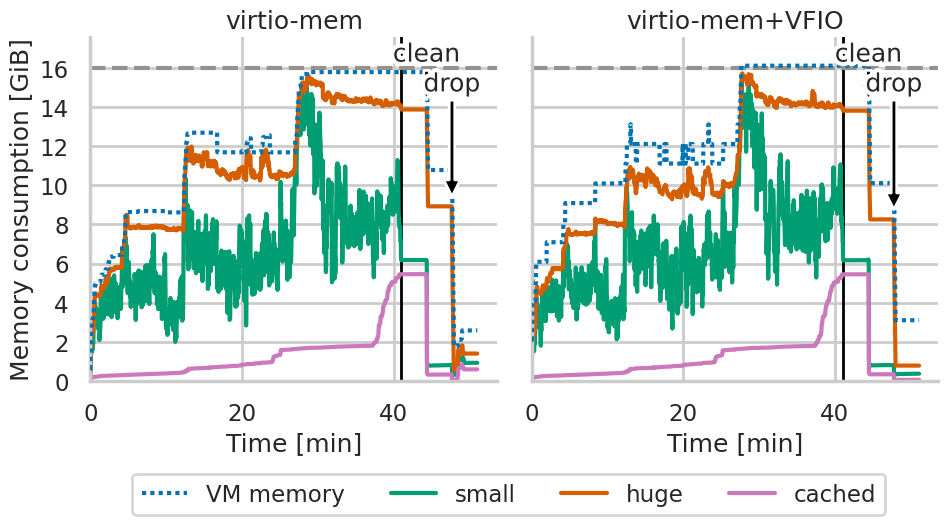

In [39]:
p = visualize({
    "virtio-mem": Path("latest/clang-virtio-mem"),
    "virtio-mem+VFIO": Path("latest/clang-virtio-mem-vfio"),
})


o=0 d=2000 c=32: 391.59 GiB*m, 48.54 min
o=0 d=2000 c=32: delay 6.50 GiB, clean 1.49 GiB, drop 1.05 GiB, 423.01 GiB*m
o=0 d=2000 c=512: 380.70 GiB*m, 48.48 min
o=0 d=2000 c=512: delay 6.33 GiB, clean 1.21 GiB, drop 0.84 GiB, 409.81 GiB*m


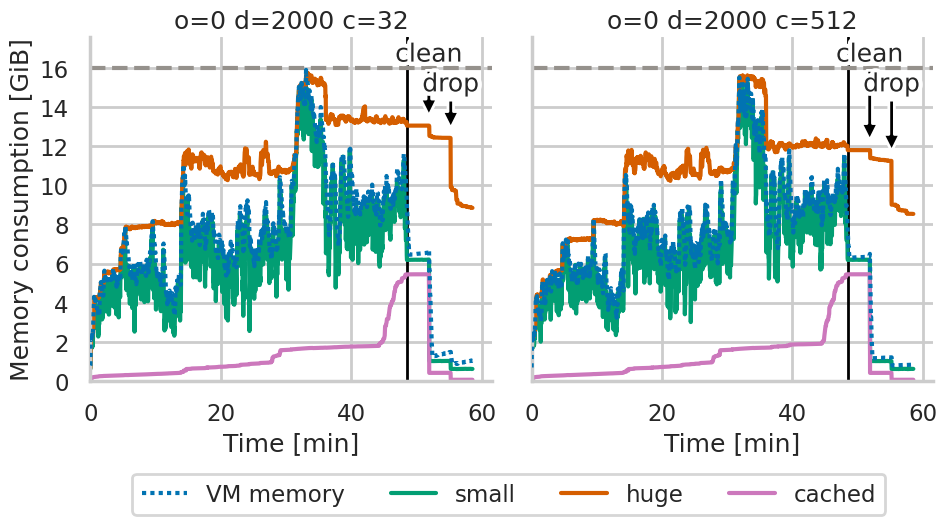

In [40]:
p = visualize({
    "o=0 d=2000 c=32": Path("latest/clang-base-auto-o0-d2000-c32"),
    "o=0 d=2000 c=512": Path("latest/clang-base-auto-o0-d2000-c512"),
})

# Overview

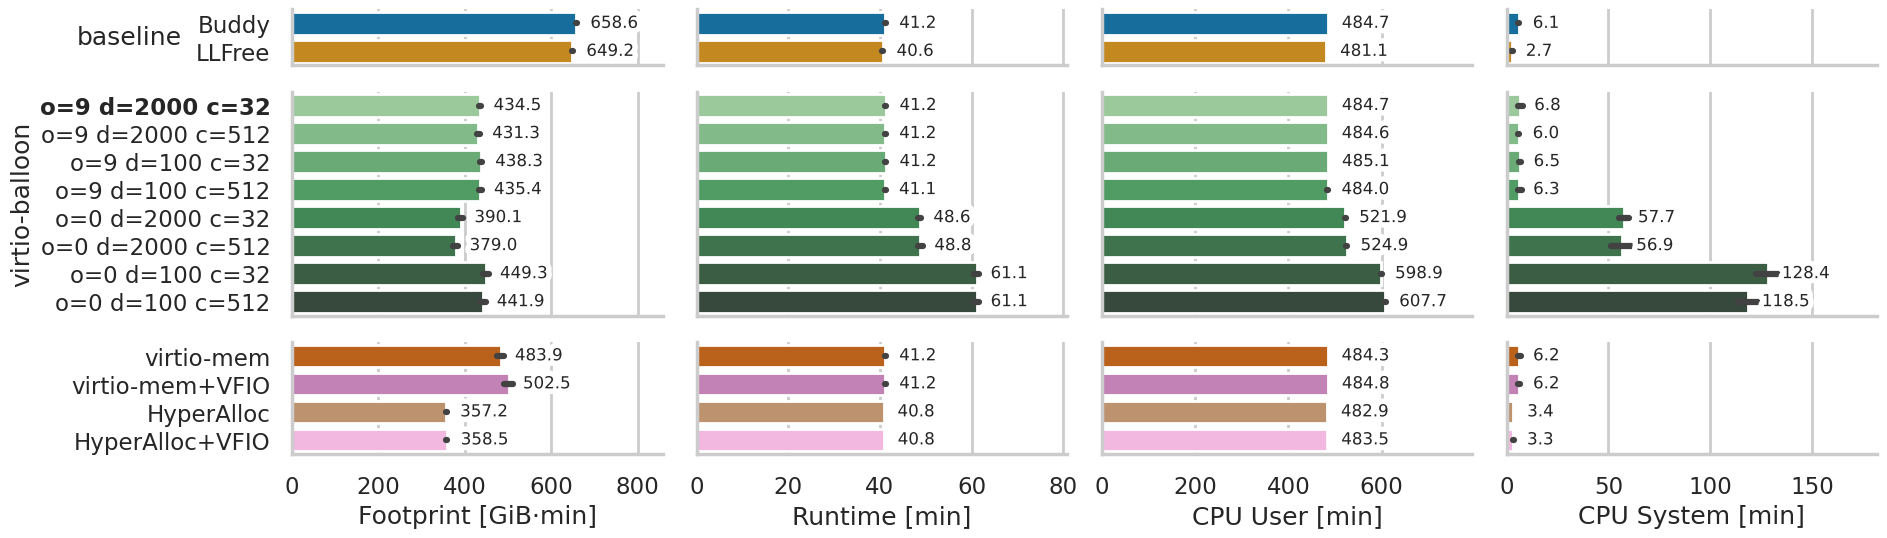

In [30]:
paths = {
    "Buddy": ("baseline", Path("latest/clang-base-manual")),
    "LLFree": ("baseline", Path("latest/clang-llfree-manual")),
    # "virtio-balloon": ("", Path("latest/clang-base-auto")),

    "o=9 d=2000 c=32": ("virtio-balloon", Path("latest/clang-base-auto-o9-d2000-c32")),
    "o=9 d=2000 c=512": ("virtio-balloon", Path("latest/clang-base-auto-o9-d2000-c512")),
    "o=9 d=100 c=32": ("virtio-balloon", Path("latest/clang-base-auto-o9-d100-c32")),
    "o=9 d=100 c=512": ("virtio-balloon", Path("latest/clang-base-auto-o9-d100-c512")),
    "o=0 d=2000 c=32": ("virtio-balloon", Path("latest/clang-base-auto-o0-d2000-c32")),
    "o=0 d=2000 c=512": ("virtio-balloon", Path("latest/clang-base-auto-o0-d2000-c512")),
    "o=0 d=100 c=32": ("virtio-balloon", Path("latest/clang-base-auto-o0-d100-c32")),
    "o=0 d=100 c=512": ("virtio-balloon", Path("latest/clang-base-auto-o0-d100-c512")),

    "virtio-mem": ("", Path("latest/clang-virtio-mem")),
    "virtio-mem+VFIO": ("", Path("latest/clang-virtio-mem-vfio")),
    "HyperAlloc": ("", Path("latest/clang-llfree-auto")),
    "HyperAlloc+VFIO": ("", Path("latest/clang-llfree-auto-vfio")),
}

p, data = overview(paths, "clang")


In [31]:
host_time = data[data["variable"] == "time_user"][["mode", "measurement"]]
host_time["measurement"] += data[data["variable"] == "time_system"]["measurement"].array
host_time.groupby("mode").describe()


measurement                                                 \
                       count        mean        std         min         25%   
mode                                                                          
Buddy                    6.0  490.761167   0.727871  489.893500  490.192125   
HyperAlloc               6.0  486.249750   0.232969  485.875167  486.129708   
HyperAlloc+VFIO          6.0  486.825528   0.427248  486.230167  486.602750   
LLFree                   6.0  483.787694   0.621612  482.717000  483.607042   
o=0 d=100 c=32           6.0  727.236500  10.260815  719.511333  719.844333   
o=0 d=100 c=512          6.0  726.230889   8.728962  712.784167  722.109458   
o=0 d=2000 c=32          6.0  579.649556   4.465168  572.971333  578.580458   
o=0 d=2000 c=512         6.0  581.789806  10.528628  571.475667  575.804083   
o=9 d=100 c=32           6.0  491.567722   0.912471  490.226000  491.191458   
o=9 d=100 c=512          6.0  490.307806   2.302696  488.728500  489.233000   
o=9 d=2000 c=32          6.0  491.494750   1.990802  488.638833  490.587500   
o=9 d=2000 c=512         6.0  490.629250   0.835218  489.343833  490.469417   
virtio-mem               6.0  490.495139   1.954864  488.623000  489.676250   
virtio-mem+VFIO          6.0  491.041194   0.999863  489.980000  490.621500   

                                                      
                         50%         75%         max  
mode                                                  
Buddy             490.738083  491.390292  491.579500  
HyperAlloc        486.315583  486.396708  486.500667  
HyperAlloc+VFIO   486.816167  487.019208  487.472167  
LLFree            483.902167  484.111167  484.515333  
o=0 d=100 c=32    721.760167  735.778250  740.730667  
o=0 d=100 c=512   726.814250  731.346792  737.573833  
o=0 d=2000 c=32   579.646500  580.299542  586.890667  
o=0 d=2000 c=512  576.744917  589.403375  596.660000  
o=9 d=100 c=32    491.622000  491.836917  492.979833  
o=9 d=100 c=512   489.353000  490.086375  494.888500  
o=9 d=2000 c=32   491.214000  492.823625  494.162833  
o=9 d=2000 c=512  490.597750  490.793208  491.951167  
virtio-mem        489.823000  490.597125  494.219333  
virtio-mem+VFIO   490.779917  491.114958  492.912000

In [32]:
# Relative difference
budiff = pd.DataFrame((host_time[host_time["mode"] == "o=9 d=2000 c=32"]["measurement"].array - host_time[host_time["mode"] == "Buddy"]["measurement"].array) / host_time[host_time["mode"] == "Buddy"]["measurement"].array)
(min, max) = stats.t.interval(0.95, len(budiff) - 1, loc=budiff.mean(), scale=stats.sem(budiff))
print(min, max, f"{(min+max)[0]/2 * 100:.2} +- {(max-min)[0]/2 * 100:.2}")
budiff.describe().T


[-0.00273987] [0.00573112] 0.15 +- 0.42


,count,mean,std,min,25%,50%,75%,max
0,6.0,0.001496,0.004036,-0.002561,-0.001725,0.000827,0.003669,0.007842


In [33]:
# Relative difference
lldiff = pd.DataFrame((host_time[host_time["mode"] == "HyperAlloc"]["measurement"].array - host_time[host_time["mode"] == "LLFree"]["measurement"].array) / host_time[host_time["mode"] == "LLFree"]["measurement"].array)
(min, max) = stats.t.interval(0.95, len(lldiff) - 1, loc=lldiff.mean(), scale=stats.sem(lldiff))
print(min, max, f"{(min+max)[0]/2 * 100:.2} +- {(max-min)[0]/2 * 100:.2}")
lldiff.describe().T


[0.00332835] [0.00685343] 0.51 +- 0.18


,count,mean,std,min,25%,50%,75%,max
0,6.0,0.005091,0.00168,0.002807,0.004209,0.00497,0.005877,0.007665


## SPEC17 Blender

virtio-balloon: 63.10 GiB*m, 8.20 min
virtio-balloon: 63.60 GiB*m, 8.18 min
virtio-balloon: 63.96 GiB*m, 8.18 min
virtio-balloon: delay 3.47 GiB, delay 4.77 GiB, delay 5.58 GiB, drop 4.08 GiB, 300.38 GiB*m
HyperAlloc: 62.93 GiB*m, 8.20 min
HyperAlloc: 63.23 GiB*m, 8.15 min
HyperAlloc: 63.57 GiB*m, 8.15 min
HyperAlloc: delay 1.77 GiB, delay 2.00 GiB, delay 2.25 GiB, drop 1.17 GiB, 233.62 GiB*m


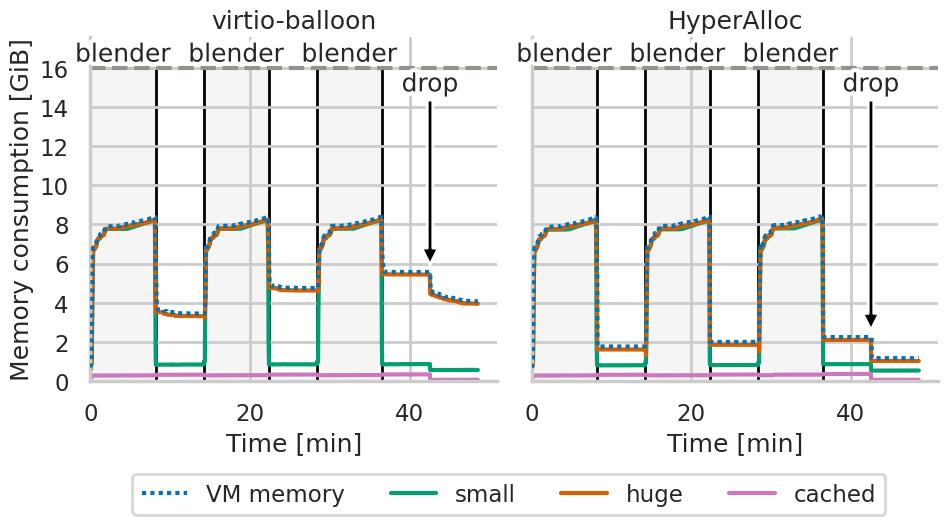

In [34]:
p = visualize({
    "virtio-balloon": Path("latest/blender-base-auto"),
    "HyperAlloc": Path("latest/blender-llfree-auto"),
}, "blender-auto", run="blender")